<a href="https://colab.research.google.com/github/Welle-Kim/Python/blob/master/MNIST_Fashion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf

fashion_mnist = tf.keras.datasets.fashion_mnist

#데이터 읽어와 0과 1사이값으로 변경
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
X_train, X_test = X_train / 255.0, X_test / 255.0

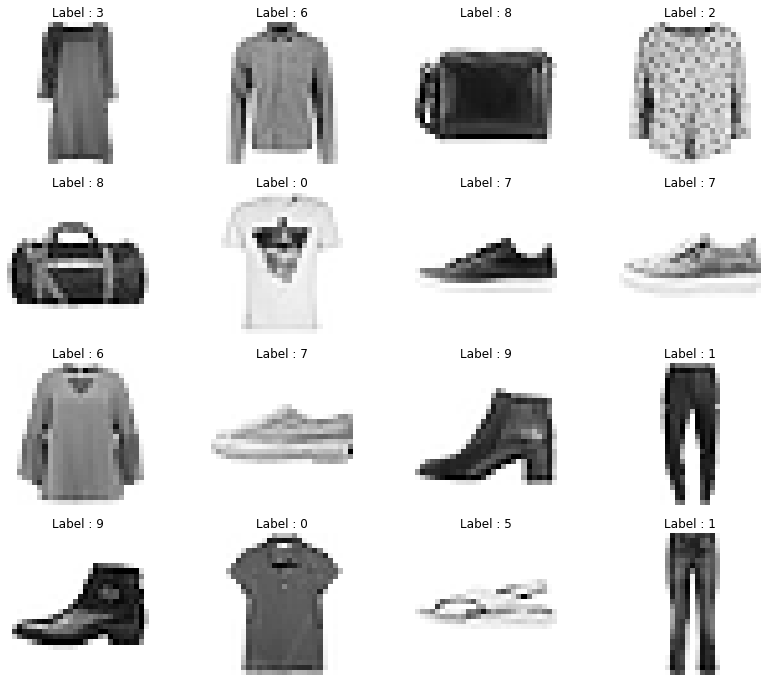

In [3]:
import random
import matplotlib.pyplot as plt

samples = random.choices(population=range(0, len(y_train)), k = 16)
plt.figure(figsize=(14, 12))

for idx, n in enumerate(samples):
    plt.subplot(4, 4, idx+1)
    plt.imshow(X_train[n].reshape(28, 28), cmap = 'Greys', interpolation='nearest')
    plt.title('Label : ' + str(y_train[n]))
    plt.axis('off')
    
plt.show()

In [ ]:
X_train[0].shape

In [9]:
## 모델 생성하기
from tensorflow.keras.layers import Dense

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
model.add(Dense(1000, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])


In [10]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 1000)              785000    
                                                                 
 dense_1 (Dense)             (None, 10)                10010     
                                                                 
Total params: 795,010
Trainable params: 795,010
Non-trainable params: 0
_________________________________________________________________


In [13]:
#모델 학습하기
import time

std=time.time()
hist=model.fit(X_train, y_train,
               epochs=10, batch_size=100, 
               validation_data=(X_test, y_test))

print(time.time()-std)

Epoch 1/10
600/600 [==============================] - 5s 3ms/step - loss: 0.4878 - acc: 0.8274 - val_loss: 0.4212 - val_acc: 0.8507
Epoch 2/10
600/600 [==============================] - 2s 3ms/step - loss: 0.3654 - acc: 0.8676 - val_loss: 0.4228 - val_acc: 0.8541
Epoch 3/10
600/600 [==============================] - 2s 3ms/step - loss: 0.3214 - acc: 0.8825 - val_loss: 0.3532 - val_acc: 0.8718
Epoch 4/10
600/600 [==============================] - 2s 3ms/step - loss: 0.2980 - acc: 0.8904 - val_loss: 0.3577 - val_acc: 0.8685
Epoch 5/10
600/600 [==============================] - 2s 3ms/step - loss: 0.2810 - acc: 0.8970 - val_loss: 0.3476 - val_acc: 0.8740
Epoch 6/10
600/600 [==============================] - 2s 3ms/step - loss: 0.2633 - acc: 0.9020 - val_loss: 0.3296 - val_acc: 0.8844
Epoch 7/10
600/600 [==============================] - 2s 3ms/step - loss: 0.2527 - acc: 0.9064 - val_loss: 0.3160 - val_acc: 0.8873
Epoch 8/10
600/600 [==============================] - 2s 3ms/step - loss: 0.

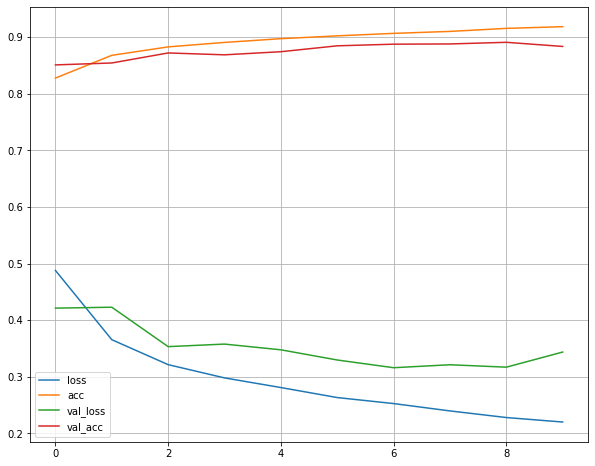

In [14]:
# Loss / Acc 곡선 그리기
plot_tg=['loss', 'acc', 'val_loss', 'val_acc']

plt.figure(figsize=(10, 8))

for each in plot_tg:
    plt.plot(hist.history[each], label=each)


plt.legend()
plt.grid()
plt.show()

In [15]:
# 테스트 데이터 정확도
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.3437 - acc: 0.8833


[0.3436563313007355, 0.8833000063896179]

In [20]:
results=model.predict(X_test)
results

array([[4.0323371e-06, 5.6811839e-08, 3.4428560e-06, ..., 3.2706927e-03,
        9.2247174e-06, 9.9590957e-01],
       [1.6937402e-05, 3.0706906e-12, 9.9928159e-01, ..., 1.2264456e-13,
        3.7506731e-09, 1.7376153e-11],
       [9.5382882e-11, 1.0000000e+00, 7.8914040e-13, ..., 9.7205870e-23,
        1.2080781e-13, 2.4038104e-17],
       ...,
       [5.0739673e-05, 3.1765909e-11, 5.3781521e-05, ..., 9.6195307e-10,
        9.9946135e-01, 3.2814315e-10],
       [3.4565112e-10, 9.9999988e-01, 3.5268632e-10, ..., 2.2811325e-16,
        6.9965722e-09, 1.2889452e-11],
       [6.2759500e-05, 2.4155892e-07, 2.1200138e-05, ..., 3.0591452e-04,
        1.4223201e-03, 4.1700578e-06]], dtype=float32)

In [21]:
y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [23]:
import numpy as np

In [24]:
classification_report(y_test, np.argmax(results, axis = -1))

'              precision    recall  f1-score   support\n\n           0       0.82      0.89      0.85      1000\n           1       0.99      0.97      0.98      1000\n           2       0.78      0.82      0.80      1000\n           3       0.90      0.90      0.90      1000\n           4       0.77      0.85      0.81      1000\n           5       0.93      0.97      0.95      1000\n           6       0.80      0.62      0.70      1000\n           7       0.98      0.85      0.91      1000\n           8       0.97      0.98      0.98      1000\n           9       0.90      0.98      0.94      1000\n\n    accuracy                           0.88     10000\n   macro avg       0.89      0.88      0.88     10000\nweighted avg       0.89      0.88      0.88     10000\n'

In [25]:
np.argmax(results, axis = -1)

array([9, 2, 1, ..., 8, 1, 5])

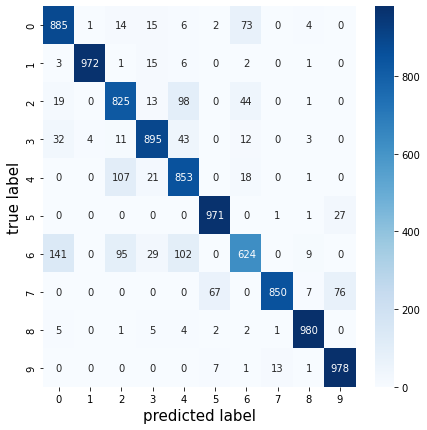

In [26]:
# 혼동 행렬을 만듭니다.
plt.figure(figsize = (7, 7))
cm = confusion_matrix(y_test, np.argmax(results, axis = -1))
sns.heatmap(cm, annot = True, fmt = 'd',cmap = 'Blues')
plt.xlabel('predicted label', fontsize = 15)
plt.ylabel('true label', fontsize = 15)
plt.show()